if both the training errror and validation errror are almost equal and fairly high, is underfitting, which mean it has a high bias. You shoud reduce a heperparameter α

# Support Vector Machine
* margin or boundaries
* support Vectors | Wx + b = 0
* versatile machine learning model
* linear and non-linear

## Soft Margin Classification

if we **stricly** impose that all instance must be off the street this is **hard margin classification**

use more flexible model to find a good balanced as large as possible and limiting *margin violation* this is called **soft margin classification**

set with hyperparameter C if low values is a soft margin


In machine learning, the **hinge loss** is a loss function used for training classifiers. The hinge loss is used for "maximum-margin" classification,

In [186]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris['data'][:,(2,3)] #petal length, petal width
y = (iris['target'] == 2)*1 # Iris virginica -> binary classification

svm_clf = Pipeline([ 
    ('scaler',StandardScaler()),
    ('linear_svc',LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

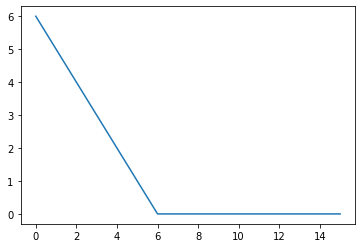

In [187]:
def hinge_loss(x):
    return max(0,1-x)

a = [hinge_loss(i) for i in range(-5,11)]
plt.plot(a);

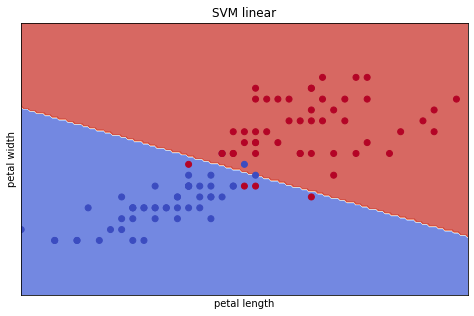

In [188]:
def plot_boundaries(model,xlabel,ylabel,title,figsize):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    plt.figure(figsize=figsize)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

plot_boundaries(svm_clf,'petal length','petal width','SVM linear',(8,5))
plt.axis([3,7,.5,3])
plt.show()

### Nonlinear SVM classification

if we make 1D to 2D(or more dimentions) its will seperable with linear line 

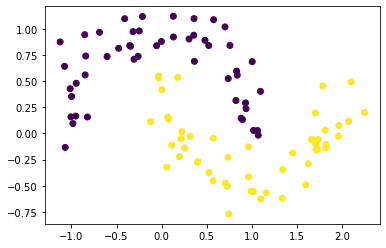

In [189]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=.15)
plt.scatter(X[:,0],X[:,1],c=y); # non-linear data

c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


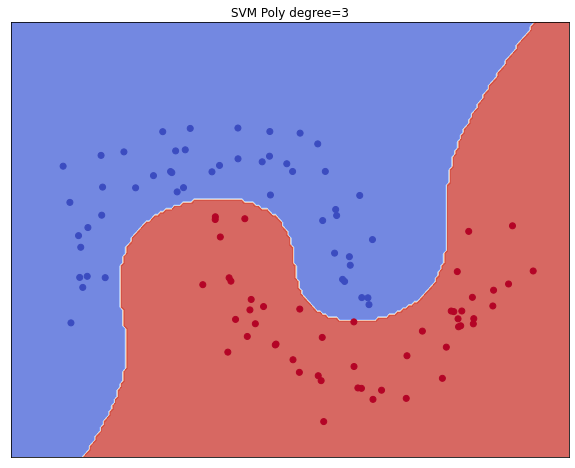

In [190]:
from sklearn.preprocessing import PolynomialFeatures # make more dimention

polynomial_svm_clf = Pipeline([ 
    ('poly',PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm_clf.fit(X,y)
plot_boundaries(polynomial_svm_clf,None,None,'SVM Poly degree=3',(10,8))
plt.axis([-1.5,2.5,-1,1.8])
plt.show()

### Polynomial Kernel

*ketnel trick* :  It allows us to operate in the original feature space without computing the coordinates of the data in a higher dimensional space.

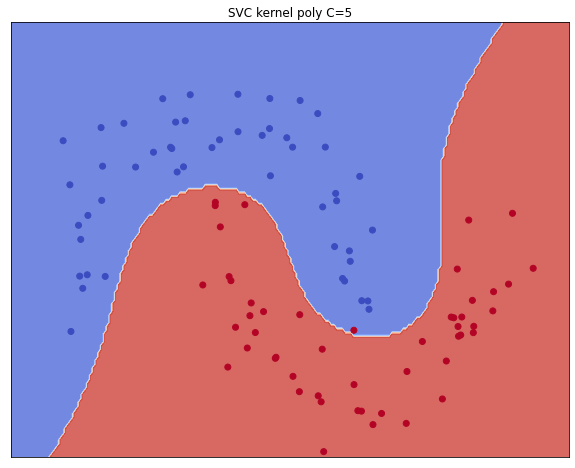

In [191]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([ 
    ('scaler', StandardScaler()),
    ('svm_clf',SVC(kernel='poly', degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)
plot_boundaries(poly_kernel_svm_clf,None,None,'SVC kernel poly C=5',(10,8))
plt.axis([-1.5,2.5,-.8,1.5])
plt.show()

> **coef0** controls how much the model is influenced by high-degree polynomials versus low-degree polynomials.

### Guassian RBF Kernel
-infinite dimensional feature space


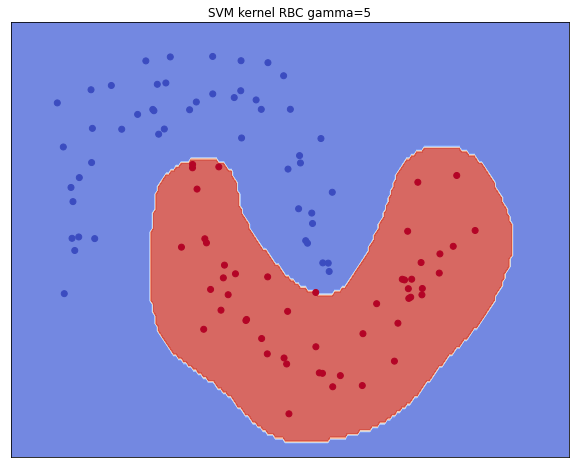

In [192]:
rbc_kerbel = Pipeline([ 
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='rbf', gamma=5, C=.001))
])

rbc_kerbel.fit(X,y)
plot_boundaries(rbc_kerbel,None,None,'SVM kernel RBC gamma=5',(10,8))
plt.axis([-1.5,3,-1,1.3])
plt.show()

> **gamma**: parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 

WHAT SHOULD TO USE?

* 1st try LinearSVC (faster than SVC(kernel='linear'))
* if not too large data using RBF Kernel
* use cross validation and grid search 

## SVM Regression

try to get data in the street with parameter ε is a width of the street


In [193]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=.1)
svm_reg.fit(X,y)

LinearSVR(epsilon=0.1)

In [194]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=.1)
svm_poly_reg.fit(X,y)
svm_poly_reg.predict(X[:10])

array([ 0.89972151,  0.85673482,  0.98865075,  0.25430744,  0.39669288,
        0.98438788,  0.42419994, -0.3707197 ,  0.71429924,  0.68935543])

In [195]:
from sklearn.metrics import mean_absolute_error

print('loss(MAE) :',mean_absolute_error(y,svm_poly_reg.predict(X)))

loss(MAE) : 0.32104617372975447
